# Lab 03: Exploring Image Data

Erik Gabrielsen, Danh Nguyen

In [1]:
import pandas as pd
import numpy as np
import os
from scipy.misc import imread
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import warnings
import seaborn as sns

%matplotlib inline



In [2]:
directory = os.path.expanduser('~/Downloads/train/')
images = []
files = []

# loop over directories: 
for i in range(1, 50001):
    name = str(i) + '.png'
    file = os.path.join(directory, name)
    images.append(mpimg.imread(file))

In [4]:
# Read in label
df = pd.read_csv('~/Downloads/trainLabels.csv') # read in the csv file
labels = df.label.values

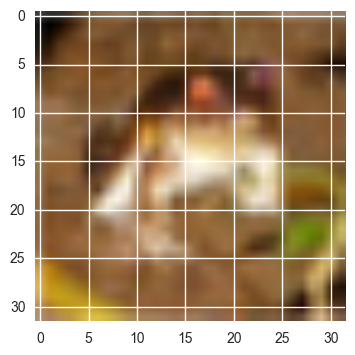

In [5]:
imgplot = plt.imshow(images[0])

In [6]:
# convert to luminance, thanks http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

for i in range(0, 5000):
    images[i] = rgb2gray(images[i])

In [7]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


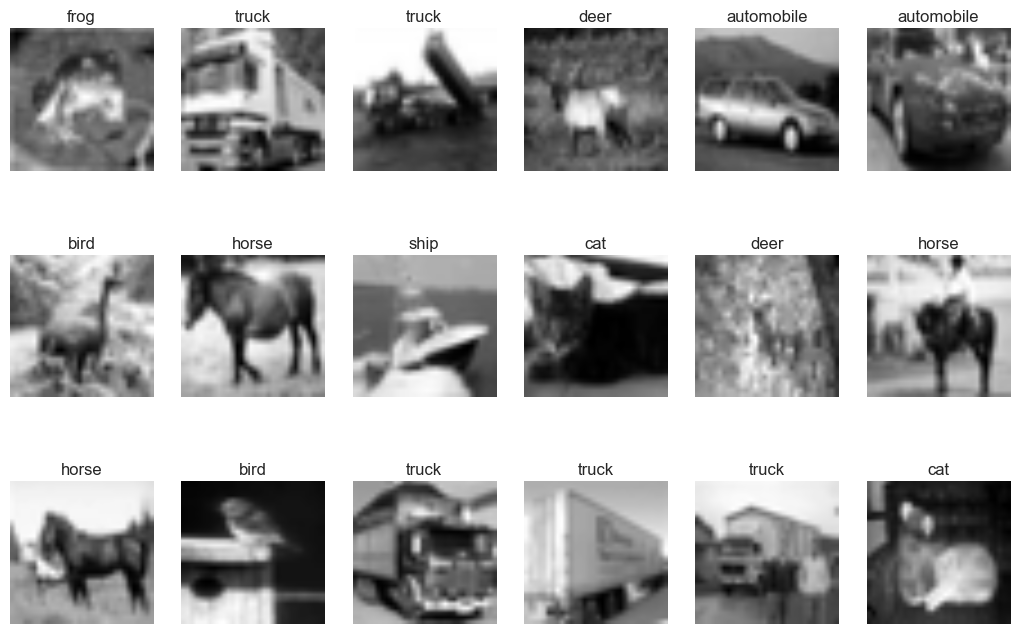

In [8]:
plot_gallery(images, labels, 32, 32) # defaults to showing a 3 by 6 subset of the faces

In [67]:
# Linearization
img_concat = []
for image in images: 
    img_concat.append(np.concatenate(image))

In [69]:
img_concat[0].shape

(1024,)